# Household Object Image Classification: Computer Vision for Home Applications

In [2]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import pandas as pd
import skimage.io as io

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import pylab
from tqdm.auto import tqdm


import cv2
import skimage

## Abstract
As Computer Vision develops alongside the increasing prevalence of cheap edge computing devices, we are seeing more innovative CV use cases that can be deployed on relatively cheap edge devices in the home such as Ring doorbells. Most models focus on detection of an individual to start a recording or send a notification; this project intends to expand that list to include detection of people, cats, dogs, backpacks, and potted plants.

This would allow models to expand their ability to recognize and interpret scenes while offering users additional functionality to monitor pet behavior and track the location of household items or the health of plants in their home by recognizing whether the image contains a certain category.


## Dataset - cocodataset.org
The COCO dataset comes in a variety of image sizes and resolutions. To standardize the data, we’ll have to create a pipeline to enforce image size/resolutions and other preprocessing steps as necessary. We plan on utilizing histograms of oriented gradients and Canny edge detection to identify objects within the image and textural features to aid in image classification across our categories.


In [3]:
images = np.load("image.npy")
image_labels = np.load("image_category.npy")

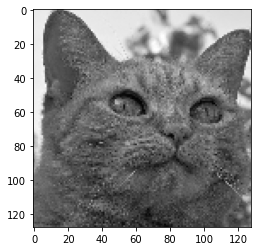

In [4]:
plt.imshow(images[-1], cmap="gray")

### Preprocessing
Our project included testing and extraction of many types of features to build out a successful classifier. The COCO dataset offers a significant number of images that include people, pets, and other household items, however these images are not isolated to a single image. To make things easier for our classifier we extracted our preselected categories from the image, ensured they would be sufficiently large to extract features, and standardized their shape.


![Preprocessing](final_report/Preprocessing.png)

Image categories were also a significant issue. Given the nature of the COCO photos, we had severely imbalanced classes. Most of our photos were of people and the first few baseline models demonstrated that when our classifier refused to predict an image as anything other than a person. We went back to preprocessing and randomly selected indices of people-images and selected only as many people as our largest minority class. 

![standard_people](final_report/image_preprocessing.png)

To up-sample our other categories we also horizontally flipped images of cats, dogs, backpacks, and potted plants. This allowed us to double the size of those classes while providing the model mirrored data that would generalize to new images.

![og_image](final_report/flipped_im.png)

![flipped_im](final_report/original_im.png)

### Feature Extraction
Once we completed the feature preprocessing, we were able to start developing and testing features. To aid in the explanation of our model features, I will be using an image of a cat I found in the COCO dataset that I have decided to name Frank. Since our model would be focusing on the shapes and contours that comprise people, pets, and household items, we were interested in various features that would identify edges, gradients, and shapes within the image.


#### Canny Features

![](final_report/cat_canny.png)

#### HOG Features

![](final_report/cat_hog.png)

#### Daisy Features

![](final_report/daisy_cat.png)

Seeing the success of HOG on our image dataset, we wanted to test what something like DAISY, a dense representation of scale-invariant features, would do for our model. As we heavily leaned into the preprocessing and isolated just the image we were interested in classifying, DAISY wasn’t operating on particularly dense features and didn’t result in significant results that would’ve been useful to the model. However, Frank does look kinda cool with a flower in his hair.

# Classification - 40 pts
This part should include code to perform classification using at least two methods learned in class,
plots showing the results of classification per category, a discussion of possible reasons why the
classifier might work better for some categories than others, and explanation of the limitations of
the classifier.

#### PCA & tSNE

#### MLP Results

#### SVC Results

# Generalizability - 10 pts
Your data should be split into train, validation, and test groups before training the classifier, and you
should do a hyperparameter search using parts of the validation set, ideally in a way that avoids over-
fitting and maximizes generalizability. Lastly, you will report performance on the test set, and include
a discussion of whether you achieved generalizability and how your training process might be
improved.

#### Hyperparameter Tuning

#### Overfitting

![](final_report/MLP_Canny.png)

#### Limitations